In [1]:
import flaremodel as fm
import numpy as np
import matplotlib.pyplot as plt
SAVE_PLOT = False

In [2]:
SgrA = fm.SgrA()

B, ne, R, R_in, p, g_min, g_max, rsteps = 10, 3e8, SgrA.Rs, 0., 3, 10., 500., 64

edist = "powerlaw"

params = [p, g_min, g_max]

In [3]:
sh_sp = fm.RadialSphere(edist=edist, rsteps=rsteps, target="cpu")
h_sp = fm.HomogeneousSphere(edist)

nu_ph = np.array([3e10, 1e11, 1.5e11, 1e12])

nus = np.logspace(10, 15, 100)

lum_sync_sh = sh_sp.compute_synchrotron(nus, ne, [R, R_in, -1], B, params)
r, phd_sh = sh_sp._compute_photon_density(nu_ph, ne, [R, R_in, -1], B, params)

/tmp/ipykernel_8357/538814947.py:6: RuntimeWarning: divide by zero encountered in true_divide
  fun = lambda x: 2./3*((1-x**2)/(2*x)*np.log((1+x)/(1-x))+1)
/tmp/ipykernel_8357/538814947.py:6: RuntimeWarning: invalid value encountered in multiply
  fun = lambda x: 2./3*((1-x**2)/(2*x)*np.log((1+x)/(1-x))+1)


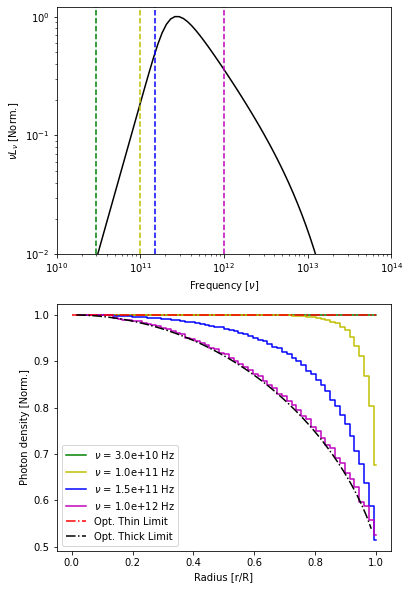

In [4]:
fig, axs = plt.subplots(2, 1, figsize=(6, 10))
cs = ["g", "y", "b", "m"]
r = r/r[-1]

# BandGrindlay85 Eq. III.4
fun = lambda x: 2./3*((1-x**2)/(2*x)*np.log((1+x)/(1-x))+1)

for i in range(4):
    norm = phd_sh[0,i]
    axs[1].plot(r, phd_sh[:,i]/norm, cs[i]+"-", 
                drawstyle='steps-mid', label=r"$\nu$ = %.1e Hz" % (nu_ph[i]))

axs[1].plot([0,1],[1,1], 'r-.', label="Opt. Thin Limit")
axs[1].plot(r, fun(r)/fun(1e-2), 'k-.', label="Opt. Thick Limit")
axs[1].legend()

axs[1].set_ylabel("Photon density [Norm.]")
axs[1].set_xlabel("Radius [r/R]")

axs[0].loglog(nus, lum_sync_sh/np.max(lum_sync_sh), 'k')
for i in range(4):
    axs[0].plot([nu_ph[i], nu_ph[i]], [1e-2, 1.2], cs[i]+"--")

axs[0].set_ylabel(r"$\nu L_\nu$ [Norm.]")
axs[0].set_xlabel(r"Frequency [$\nu$]")
axs[0].set_ylim([1e-2, 1.2])
axs[0].set_xlim([1e10, 1e14]);

if SAVE_PLOT: fig.savefig("Ph_HomoSp.eps", bbox_inches="tight", dpi=300)

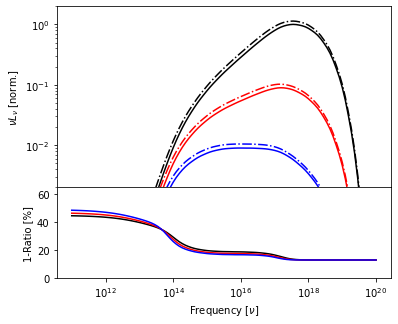

In [5]:
fig, axs = plt.subplots(2, figsize=(6, 5), gridspec_kw={"height_ratios": [2,1], "hspace": 0})
params[2] = 500
cs = ["k", "r", "b"]
nus = np.logspace(11, 20, 100)
ps = [2., 2.5, 3.]
for i in range(3):
    params[0] = ps[i]
    lum_ssc_h = h_sp.compute_SSC(nus, ne, [R, -1], B, params, gamma_min=g_min, gamma_max=g_max)
    lum_ssc_sh = sh_sp.compute_SSC(nus, ne, [R, R_in, -1], B, params, gamma_min=g_min, gamma_max=g_max)
    if i == 0: norm = np.max(lum_ssc_h*nus)
    axs[0].loglog(nus, lum_ssc_sh*nus/norm, cs[i]+'-.')
    axs[0].loglog(nus, lum_ssc_h*nus/norm, cs[i]+'-')
    axs[1].semilogx(nus, 100*(lum_ssc_sh/lum_ssc_h-1), cs[i]+'-')
axs[0].set_ylim([2e-3, 2])
axs[1].set_ylim([0, 65])
axs[0].set_ylabel(r"$\nu L_\nu$ [norm.]")
axs[1].set_xlabel(r"Frequency [$\nu$]")
axs[1].set_ylabel(r"1-Ratio [%]")
if SAVE_PLOT: fig.savefig("SSC_Comp.eps", bbox_inches="tight", dpi=300)